In [23]:
import numpy as np


In [24]:
lkr_2_group1 = 360  # mm
b_group1 = 225  # mm
lkr_2 = lkr_2_group1 / 1000  # m
b = b_group1 / 1000  # m


In [25]:
EI_data = np.array([35000, 32000, 25000, 20000, 15000, 10000, 7000, 4000, 2000])


In [26]:

GJd_data = np.array([
    1050,  # y=0
    975,   # y=0.125
    525,   # y=0.25
    450,   # y=0.375
    250,   # y=0.5
    125,   # y=0.625
    100,   # y=0.75
    50,    # y=0.875
    25     # y=1.0
])  # [N*m^2]


In [27]:
y_points = np.array([0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0])*lkr_2


In [28]:
#   # Table 1, variant 2 data
e = np.array([
    0.007,
    0.008,
    0.01,
    0.012,
    0.011,
    0.01,
    0.0105,
    0.0115,
    0.015
])


In [29]:

def create_weight_matrix(lkr_2):
    # Create diagonal weight matrix using Simpson's rule
    w = np.array([1, 4, 2, 4, 2, 4, 2, 4, 1], dtype=np.float64)
    W = np.diag(0.125 * lkr_2 / 3 * w)

    return W

W = create_weight_matrix(lkr_2)


In [30]:
from scipy.interpolate import Akima1DInterpolator
from scipy.integrate import quad

def calculate_influence_matrix_C_z():

    n = len(y_points)
    x = np.array(y_points)
    y_vals = np.array(list(EI_data))
    interpolated_fn = Akima1DInterpolator(x, y_vals)

    def EI(y):
      return interpolated_fn(y)

    def integrand1(y):
        return 1/EI(y)

    def integrand2(y, lambda_val):
        return lambda_val/EI(y)

    def integrand3(y, lambda_val):
        return lambda_val*lambda_val/EI(y)

    C_z = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == 0 or j == 0:
                continue

            yi = y_points[i]
            yj = y_points[j]

            y=min(yi, yj)

            # Calculate three integrals
            int1, _ = quad(integrand1, 0, y)
            int2, _ = quad(lambda l: integrand2(l, l), 0, y)
            int3, _ = quad(lambda l: integrand3(l, l), 0, y)


            # Apply formula
            C_z[i,j] = yi*yj*int1 - (yi+yj)*int2 + int3

    return C_z

calculate_influence_matrix_C_z()

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 8.78452597e-10, 2.20420647e-09, 3.52996034e-09,
        4.85571421e-09, 6.18146807e-09, 7.50722194e-09, 8.83297581e-09,
        1.01587297e-08],
       [0.00000000e+00, 2.20420647e-09, 7.22603151e-09, 1.27838586e-08,
        1.83416858e-08, 2.38995129e-08, 2.94573400e-08, 3.50151672e-08,
        4.05729943e-08],
       [0.00000000e+00, 3.52996034e-09, 1.27838586e-08, 2.55341753e-08,
        3.89618224e-08, 5.23894694e-08, 6.58171164e-08, 7.92447634e-08,
        9.26724105e-08],
       [0.00000000e+00, 4.85571421e-09, 1.83416858e-08, 3.89618224e-08,
        6.39934785e-08, 8.98961818e-08, 1.15798885e-07, 1.41701588e-07,
        1.67604292e-07],
       [0.00000000e+00, 6.18146807e-09, 2.38995129e-08, 5.23894694e-08,
        8.98961818e-08, 1.33258976e-07, 1.77850399e-07, 2.22441821e-07,
        2.6

In [31]:
def calculate_influence_matrix_C_theta():
    n = len(y_points)
    x = np.array(y_points)
    y_vals = np.array(list(GJd_data))
    interpolated_fn = Akima1DInterpolator(x, y_vals)

    def GJd(y):
        return interpolated_fn(y)

    def integrand(y):
        return 1/GJd(y)

    C_theta = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == 0 or j == 0:
                continue

            yi = y_points[i]
            yj = y_points[j]
            y = min(yi, yj)

            # Calculate integral for torsional influence
            integral, _ = quad(integrand, 0, y)
            C_theta[i,j] = lkr_2 * integral

    return C_theta

C_theta = calculate_influence_matrix_C_theta()
C_theta

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.55307012e-05, 1.55307012e-05, 1.55307012e-05,
        1.55307012e-05, 1.55307012e-05, 1.55307012e-05, 1.55307012e-05,
        1.55307012e-05],
       [0.00000000e+00, 1.55307012e-05, 3.82202298e-05, 3.82202298e-05,
        3.82202298e-05, 3.82202298e-05, 3.82202298e-05, 3.82202298e-05,
        3.82202298e-05],
       [0.00000000e+00, 1.55307012e-05, 3.82202298e-05, 7.14294468e-05,
        7.14294468e-05, 7.14294468e-05, 7.14294468e-05, 7.14294468e-05,
        7.14294468e-05],
       [0.00000000e+00, 1.55307012e-05, 3.82202298e-05, 7.14294468e-05,
        1.19371051e-04, 1.19371051e-04, 1.19371051e-04, 1.19371051e-04,
        1.19371051e-04],
       [0.00000000e+00, 1.55307012e-05, 3.82202298e-05, 7.14294468e-05,
        1.19371051e-04, 2.14224688e-04, 2.14224688e-04, 2.14224688e-04,
        2.1

In [32]:
def calculate_characteristic_matrix(C_theta, e, W):
    """
    Calculate [B] = [Cθ]⋅diag[e]⋅diag[W]
    """
    # Form diagonal matrices
    E = np.diag(e)

    # Calculate B matrix
    B = C_theta @ E @ W

    return B

def solve_eigenvalue_problem(B):
    """
    Solve eigenvalue problem ([B] - λ[E]){θ} = 0
    """
    # [E] is identity matrix
    eigenvalues = np.linalg.eigvals(B)

    # Get the largest positive real eigenvalue
    positive_eigenvals = eigenvalues[np.real(eigenvalues) > 0]
    lambda_cr = np.max(np.real(positive_eigenvals))

    return lambda_cr

# Using your e data
e = np.array([
    0.007, 0.008, 0.01, 0.012, 0.011,
    0.01, 0.0105, 0.0115, 0.015
])

# Calculate B matrix
B = calculate_characteristic_matrix(C_theta, e, W)

# Solve eigenvalue problem
lambda_cr = solve_eigenvalue_problem(B)

# print("\nCharacteristic Matrix B:")
# print(B)
print("\nCritical eigenvalue λ_cr:", lambda_cr)

B


Critical eigenvalue λ_cr: 7.184635629230544e-07


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 7.45473659e-09, 4.65921037e-09, 1.11821049e-08,
        5.12513140e-09, 9.31842074e-09, 4.89217089e-09, 1.07161838e-08,
        3.49440778e-09],
       [0.00000000e+00, 7.45473659e-09, 1.14660690e-08, 2.75185655e-08,
        1.26126759e-08, 2.29321379e-08, 1.20393724e-08, 2.63719586e-08,
        8.59955172e-09],
       [0.00000000e+00, 7.45473659e-09, 1.14660690e-08, 5.14292017e-08,
        2.35717174e-08, 4.28576681e-08, 2.25002757e-08, 4.92863183e-08,
        1.60716255e-08],
       [0.00000000e+00, 7.45473659e-09, 1.14660690e-08, 5.14292017e-08,
        3.93924468e-08, 7.16226306e-08, 3.76018811e-08, 8.23660252e-08,
        2.68584865e-08],
       [0.00000000e+00, 7.45473659e-09, 1.14660690e-08, 5.14292017e-08,
        3.93924468e-08, 1.28534813e-07, 6.74807768e-08, 1.47815035e-07,
        4.8


Divergence Analysis Results:
Critical dynamic pressure q_div: 6.92e+05 N/m²
Lift curve slope c_α: 2.793

Divergence speeds:
H = -2 km: 984.3 km/h
H =  0 km: 1063.1 km/h
H =  2 km: 1172.6 km/h
H =  4 km: 1300.2 km/h
H =  6 km: 1448.4 km/h


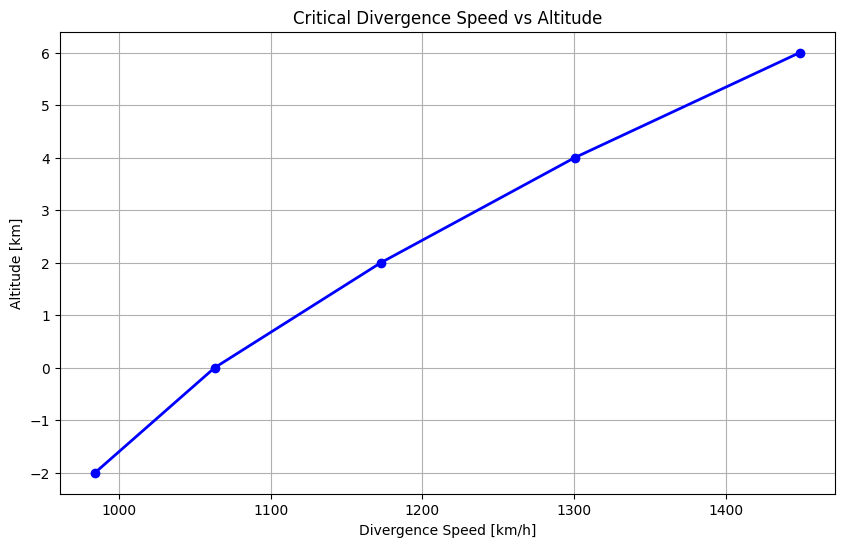

In [33]:
def calculate_divergence_speed(lambda_cr, lkr_2):
    """
    Calculate divergence speed using:
    q_div = 1 / (λ * l * c_alpha)
    V_div = sqrt(2q_div / ρ)
    """
    # Calculate lift coefficient derivative using Diederich formula
    AR = lkr_2*2/b  # aspect ratio
    c_alpha_inf = 2 * np.pi
    c_alpha = c_alpha_inf * AR / (AR + 4)

    # Calculate critical dynamic pressure
    q_div = 1 / (lambda_cr * lkr_2*2 * c_alpha)

    # Calculate speeds for different altitudes
    rho = np.array([1.429, 1.225, 1.007, 0.819, 0.660])  # densities from -2 to 6 km
    h_range = np.arange(-2, 7, 2)  # heights in km

    V_div = np.sqrt(2 * q_div / rho)

    print("\nDivergence Analysis Results:")
    print(f"Critical dynamic pressure q_div: {q_div:.2e} N/m²")
    print(f"Lift curve slope c_α: {c_alpha:.3f}")
    print("\nDivergence speeds:")
    for h, v in zip(h_range, V_div):
        print(f"H = {h:2.0f} km: {v:.1f} km/h")

    return q_div, V_div

# Calculate divergence speed
q_div, V_div = calculate_divergence_speed(lambda_cr, lkr_2)

# Optional: plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
h_range = np.arange(-2, 7, 2)
plt.plot(V_div, h_range, 'bo-', linewidth=2)
plt.grid(True)
plt.xlabel('Divergence Speed [km/h]')
plt.ylabel('Altitude [km]')
plt.title('Critical Divergence Speed vs Altitude')
plt.show()